___
# <font color= #d4b1e6> **Laboratorio de Modelado de Datos** </font>
- <Strong> Nombre de los integrantes: </Strong>  <font color="blue">`Diana Denise Valdivia Vargas 752959, Priscila Cervantes Ramírez 750722 & Mónica Ibarra 750601` </font>
- <Strong> Fecha:  </Strong>  <font color="blue">`25 de octubre 2024` </font>
___


## <font color=  #c9d996> **Estimación de precio de un vuelo**</font>

In [1]:
#Librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_csv('Clean_Dataset.csv')
df.head()


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df_final=df.drop(['Unnamed: 0', 'flight'], axis=1)
df_final

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


Se eliminó la variable de **'flights'** ya que es el identificador del vuelo por lo que cada valor es único.

## <font color= #96d9cf> **Tranformación cuadrada de 'duration'**</font>

In [4]:
df_trans=df_final.copy()
df_trans.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
df_trans['duration_no_skewness'] = np.sqrt(df_trans['duration'])

Al tener un sesgo positivo moderado se utilizó la transformación de raíz cuadrada para mitigar la asimetría.

## <font color= #96d9cf> **Transformación logarítmica 'price'**</font>

In [6]:
df_trans['price_no_skewness']=np.log(df_trans['price'])

Al tener un sesgo positivo alto se utilizó la transformación logarítmica para mitigar la asimetría ya que es una transformación fuerte.

In [7]:
df_trans=df_trans.drop(['duration', 'price'],axis=1)
df_trans.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,duration_no_skewness,price_no_skewness
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,1,1.473092,8.691651
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,1.526434,8.691651
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,1.473092,8.692154
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,1.500000,8.691986
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,1,1.526434,8.691986


## <font color= #96d9cf> **Codificación de variables**</font>

In [8]:
columnas_categoricas = ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city', 'class']
encoder = OneHotEncoder(sparse_output=False)

columnas_encoded = encoder.fit_transform(df_trans[columnas_categoricas])
df_encoded = pd.DataFrame(columnas_encoded, columns=encoder.get_feature_names_out(columnas_categoricas))

df_final = pd.concat([df_trans.drop(columns=columnas_categoricas), df_encoded], axis=1)
df_final.head()

,stops,days_left,duration_no_skewness,price_no_skewness,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,zero,1,1.473092,8.691651,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,zero,1,1.526434,8.691651,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,zero,1,1.473092,8.692154,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,zero,1,1.500000,8.691986,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,zero,1,1.526434,8.691986,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


Las variables de **'airline'**, **'source_city'**, **'departure_time'**, **'arrival_time'**, **'destination_city'**, **'class'** fueron codificadas con el método de One-Hot que aplica 1 a la categoría que corresponde y 0 en todas las demás. Se codificaron de este modo, ya que los datos de las variables no tienen un orden natural y tienen un número de categorías no tan grandes, ya que las máximas categorías por variable son de 6.

In [9]:

stops_ordinales = ['stops']
ordinal_encoder = OrdinalEncoder(categories=[['zero', 'one', 'two_or_more']])

columnas_encoded = ordinal_encoder.fit_transform(df_final[stops_ordinales])
df_encoded = pd.DataFrame(columnas_encoded, columns=stops_ordinales)

df_final = pd.concat([df_final.drop(columns=stops_ordinales), df_encoded], axis=1)
df_final.head()

,days_left,duration_no_skewness,price_no_skewness,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Bangalore,...,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy,stops
0,1,1.473092,8.691651,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1,1.526434,8.691651,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1,1.473092,8.692154,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,1.500000,8.691986,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1,1.526434,8.691986,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


La variable de **'stops'** fue codificada de manera ordinal ya que el orden sí importa en esta variable dependiendo de las paradas que hace el avión, a diferencia de las otras columnas categóricas que sus categorías no tienen un orden.

## <font color= #96d9cf> **División de entrenamiento y prueba**</font>

In [13]:
# división de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X = df_final.drop(['price_no_skewness'],axis=1)
y = df_final['price_no_skewness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% de prueba

Se dividen los datos en conjunto de entrenamiento de prueba. El conjunto de entrenamiento es del 80%, mientras que el de prueba es del 20%. 


In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import time

## <font color= #96d9cf> **Comparación de modelo**</font>

### <font color= #c9d996> **Random Forest**</font>

### <font color= #d4b1e6> **Tuneo de Hiperparámetros**</font>

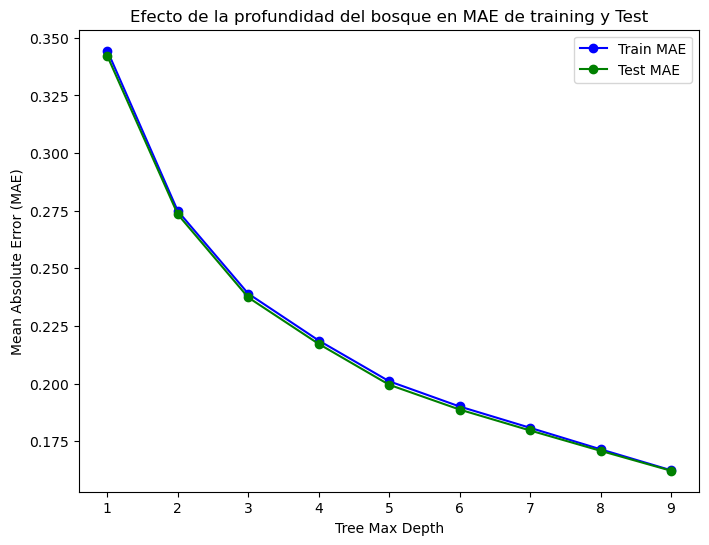

In [36]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

max_depths = range(1, 10)
train_mae = []
test_mae = []

for max_depth in max_depths:
    tree_reg = RandomForestRegressor(max_depth=max_depth, random_state=42)
    tree_reg.fit(X_train, y_train.values.ravel())
    
    # Predicciones
    y_train_pred = tree_reg.predict(X_train)
    y_test_pred = tree_reg.predict(X_test)
    
    # Calcular MAE y guardar
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(max_depths, train_mae, label='Train MAE', color='blue', marker='o')
plt.plot(max_depths, test_mae, label='Test MAE', color='green', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Efecto de la profundidad del bosque en MAE de training y Test')
plt.legend()
plt.show()

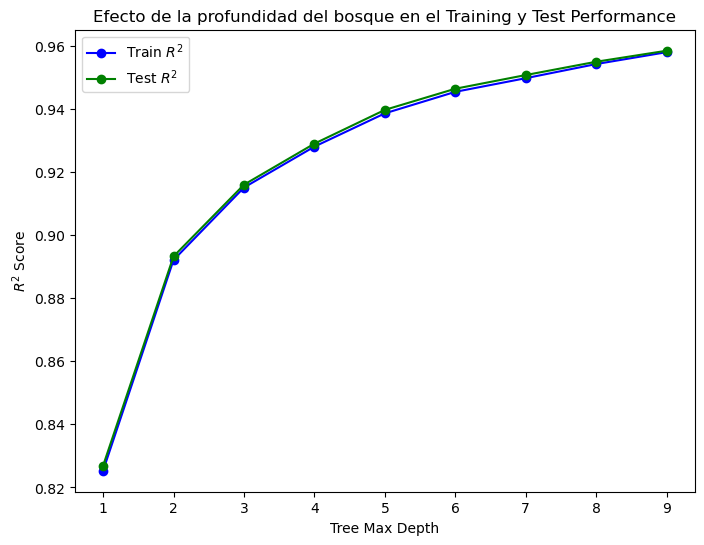

In [ ]:
max_depths = range(1, 10)
train_scores = []
test_scores = []

for max_depth in max_depths:
    tree_reg = RandomForestRegressor(max_depth=max_depth, random_state=42)
    tree_reg.fit(X_train, y_train.values.ravel())
    train_scores.append(tree_reg.score(X_train, y_train))
    test_scores.append(tree_reg.score(X_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(max_depths, train_scores, label='Train $MAE$', color='blue', marker='o')
plt.plot(max_depths, test_scores, label='Test $MAE$', color='green', marker='o')
plt.xlabel('Tree Max Depth')
plt.ylabel('$MAE$ Score')
plt.title('Efecto de la profundidad del bosque en el Training y Test Performance')
plt.legend()
plt.show()

Podemos elegir entre 3 y 5 profundidades

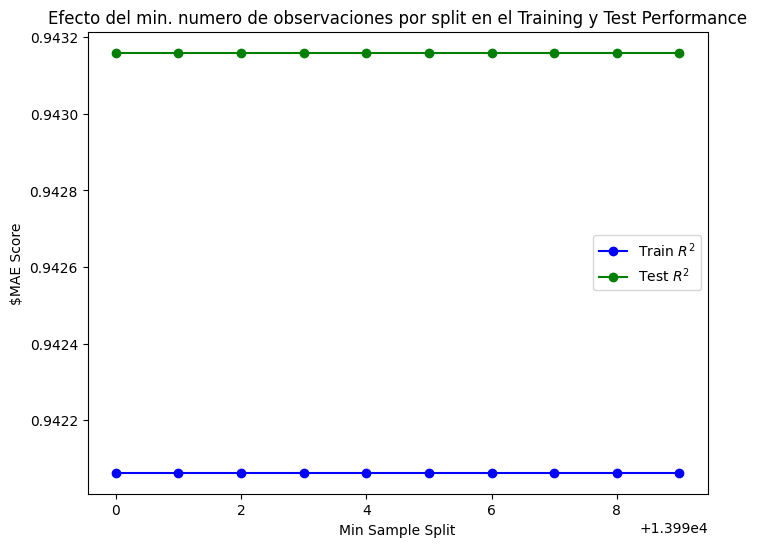

In [14]:
min_samples_splits = range(13990, 14000)
train_scores = []
test_scores = []

for min_samples_split in min_samples_splits:
    tree_reg = RandomForestRegressor(min_samples_split=min_samples_split, random_state=42)
    tree_reg.fit(X_train, y_train.values.ravel())
    train_scores.append(tree_reg.score(X_train, y_train))
    test_scores.append(tree_reg.score(X_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(min_samples_splits, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(min_samples_splits, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Min Sample Split')
plt.ylabel('$MAE Score')
plt.title('Efecto del min. numero de observaciones por split en el Training y Test Performance')
plt.legend()
plt.show()

Podemos elegir 13991 min sample split
.

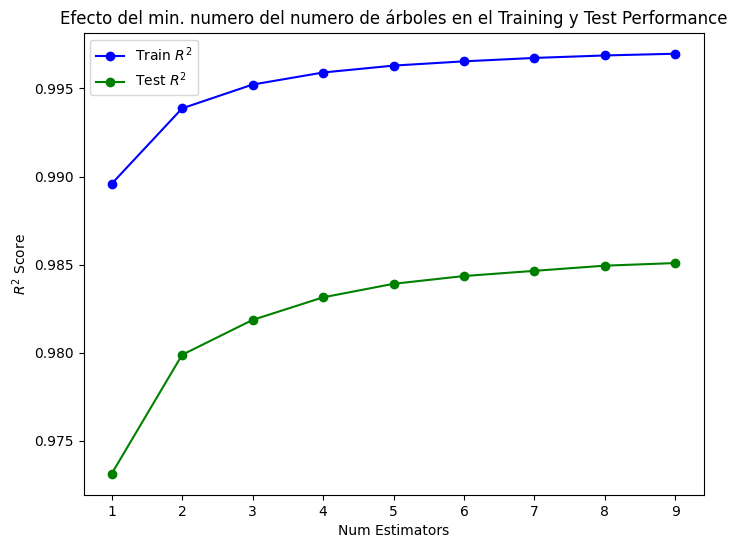

In [15]:
#graficamos el n_estimators vs la R2
n_estimators = range(1, 10)
train_scores = []
test_scores = []

for n_estimator in n_estimators:
    tree_reg = RandomForestRegressor(n_estimators=n_estimator, random_state=42)
    tree_reg.fit(X_train, y_train.values.ravel())
    train_scores.append(tree_reg.score(X_train, y_train))
    test_scores.append(tree_reg.score(X_test, y_test))

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(n_estimators, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(n_estimators, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('Num Estimators')
plt.ylabel('$R^2$ Score')
plt.title('Efecto del min. numero del numero de árboles en el Training y Test Performance')
plt.legend()
plt.show()

Podemos escoger 1 de n_estimators ya que parece que está sobreajustando

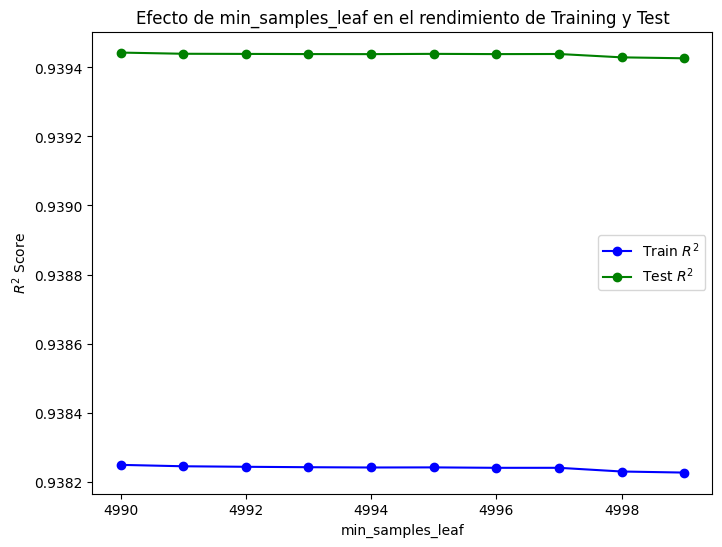

In [16]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Rango de valores para min_samples_leaf
min_samples_leaves = range(4990, 5000)
train_scores = []
test_scores = []

for min_samples_leaf in min_samples_leaves:
    tree_reg = RandomForestRegressor(min_samples_leaf=min_samples_leaf, random_state=42)
    tree_reg.fit(X_train, y_train.values.ravel())
    train_scores.append(tree_reg.score(X_train, y_train))
    test_scores.append(tree_reg.score(X_test, y_test))

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(min_samples_leaves, train_scores, label='Train $R^2$', color='blue', marker='o')
plt.plot(min_samples_leaves, test_scores, label='Test $R^2$', color='green', marker='o')
plt.xlabel('min_samples_leaf')
plt.ylabel('$R^2$ Score')
plt.title('Efecto de min_samples_leaf en el rendimiento de Training y Test')
plt.legend()
plt.show()

Podemos escoger min_samples_leaf de 4991

## <font color= #96d9cf> **Modelado Random Forest**</font>

In [ ]:
from sklearn.model_selection import GridSearchCV

model = RandomForestRegressor(criterion='absolute_error',
                               min_samples_leaf= 4991,
                               min_samples_split=13991,
                               n_estimators=1,
                               bootstrap=True,
                               oob_score=False,
                               random_state=42,
                               verbose=0)

gs = GridSearchCV(model,
                  param_grid = { 
                                'max_depth': range(3, 6) #profundidad máxima
                                },
                  scoring='neg_mean_absolute_error')
start_time = time.time()
#Entrenamiento
gs.fit(X_train, y_train.values.ravel())
print("--- %s seconds ---" % (time.time() - start_time))

--- 3791.535906791687 seconds ---


In [73]:
print(gs.best_params_)

{'max_depth': 5}


In [76]:

random_forest = RandomForestRegressor(
    n_estimators=1,
    criterion='absolute_error',  # Corrección del criterio
    max_depth=5,
    min_samples_split=13991,
    min_samples_leaf=4991,
    bootstrap=True,
    oob_score=False,
    random_state=42,
    verbose=0
)

start_time = time.time()

# Entrenamiento
random_forest.fit(X_train, y_train.values.ravel())
print("--- %s seconds ---" % (time.time() - start_time))


--- 3410.06906580925 seconds ---


In [77]:
from sklearn.metrics import r2_score
yhat = random_forest.predict(X_test)
R2_score = r2_score(y_test,yhat)
print('R2:', R2_score)

R2: 0.9335082339044101


In [78]:
from sklearn.metrics import mean_absolute_error
MAE_score = mean_absolute_error(y_test, yhat)
print('MAE:', MAE_score)

MAE: 0.2105531504253826
